In [1]:
# 1. Install YOLOv8
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 14.3 MB/s eta 0:00:00


In [2]:
# 2. Import the library
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# 3. Mount Google Drive (if dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 4. Set up dataset directory
DATASET_PATH = '/content/drive/MyDrive/dataset'  # Update this to your dataset path
IMAGES_PATH = os.path.join(DATASET_PATH, 'images')
LABELS_PATH = os.path.join(DATASET_PATH, 'labels')

In [5]:
# Check if paths exist
assert os.path.exists(IMAGES_PATH), "Images path doesn't exist!"
assert os.path.exists(LABELS_PATH), "Labels path doesn't exist!"

# 5. Create a YAML configuration file for YOLO
DATA_YAML_PATH = os.path.join(DATASET_PATH, 'data.yaml')
data_yaml_content = f"""
train: {os.path.join(IMAGES_PATH, 'train')}
val: {os.path.join(IMAGES_PATH, 'test')}
nc: 4
names: ['channel','flash','cavity','crack/groove']
"""

with open(DATA_YAML_PATH, 'w') as f:
    f.write(data_yaml_content)


In [6]:
# 6. Initialize the YOLO model
model = YOLO('yolov8n.pt')  # Choose from yolov8n, yolov8s, yolov8m, yolov8l depending on your resources

100%|██████████| 6.25M/6.25M [00:00<00:00, 85.3MB/s]


In [7]:
# 7. Train the model
model.train(
    data=DATA_YAML_PATH,
    epochs=50,            # Number of epochs
    batch=16,             # Batch size (adjust based on GPU memory)
    imgsz=640,            # Image size
)


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.8MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/labels/train.cache... 229 images, 50 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset/labels/test.cache... 41 images, 9 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      2.247      4.263      1.894         18        640: 100%|██████████| 15/15 [00:30<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         41         73     0.0029      0.272     0.0234       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.2G      1.986      3.595      1.699         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         41         73    0.00253      0.318     0.0506      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G      1.907      3.163      1.615         14        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         41         73       0.55     0.0256     0.0215     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G        1.8      2.774      1.486         21        640: 100%|██████████| 15/15 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         41         73      0.554       0.01     0.0752     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G       1.71      2.627      1.484         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         41         73      0.407      0.129      0.124      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.2G      1.738      2.548      1.514         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         41         73      0.409      0.149      0.152     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.2G      1.746      2.555      1.486         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         41         73      0.448      0.148      0.181     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.23G       1.75      2.392       1.52         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         41         73      0.537      0.142      0.171     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.23G      1.751      2.448      1.506         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         41         73      0.563      0.217       0.26      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.23G      1.653      2.286      1.441         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         41         73       0.36      0.311      0.209     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G      1.662      2.197       1.46         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         41         73      0.469      0.297      0.298      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.23G      1.604      2.056      1.391         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         41         73      0.389      0.432      0.378      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G      1.665      2.027      1.379         24        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         41         73      0.412       0.44       0.43      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.23G      1.598      1.949      1.403         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         41         73      0.532        0.5      0.422      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.2G      1.551      1.918      1.389         25        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         41         73       0.65      0.244      0.409      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.24G      1.576      1.898      1.376         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


                   all         41         73      0.463      0.566      0.546      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.24G      1.527      1.739      1.323         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         41         73      0.613      0.425      0.526      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.23G      1.533      1.748      1.354         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         41         73      0.548      0.513      0.545       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.22G      1.463      1.606      1.289         23        640: 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         41         73      0.599      0.516      0.598      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.23G      1.488      1.619      1.312         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         41         73      0.706      0.409      0.586      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.21G      1.437      1.634      1.317         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         41         73       0.64      0.593      0.579      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.23G      1.413      1.471      1.263         23        640: 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         41         73       0.63       0.34      0.483      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.21G       1.42      1.495      1.271         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         41         73      0.675      0.447      0.579      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.21G      1.437      1.493      1.267         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         41         73      0.781      0.584      0.655      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G      1.359       1.45      1.261         25        640: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         41         73      0.844      0.569      0.644      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.23G      1.378      1.406      1.232         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


                   all         41         73      0.587      0.545      0.593      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.22G      1.369      1.391      1.222         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         41         73      0.728      0.554      0.675      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G      1.379      1.347      1.261         21        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         41         73      0.696      0.597      0.648      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G      1.331      1.279      1.208         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         41         73      0.537      0.682      0.647      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.21G      1.285      1.274      1.199         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         41         73      0.523      0.685      0.611      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.23G       1.29      1.286      1.195         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         41         73      0.569      0.657      0.604      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.23G      1.283       1.25      1.194         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         41         73      0.665      0.679      0.668      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.23G      1.277      1.238      1.197         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         41         73      0.642      0.711      0.676      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.21G      1.258      1.188      1.179         26        640: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         41         73      0.544      0.712       0.68      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G      1.235      1.198      1.181          9        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         41         73      0.613      0.735      0.678      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.23G      1.247      1.205      1.201         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         41         73      0.607      0.702      0.646      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.2G      1.246      1.148       1.17         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         41         73      0.743      0.614       0.65      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.23G      1.199      1.105      1.145         22        640: 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         41         73      0.604      0.687      0.615      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.22G      1.175      1.096      1.153         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         41         73      0.574       0.79      0.603        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.21G      1.189      1.122      1.159         22        640: 100%|██████████| 15/15 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         41         73      0.631      0.662      0.625      0.308


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.21G      1.225      1.357      1.214          8        640: 100%|██████████| 15/15 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         41         73      0.594      0.674      0.598      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.21G      1.205      1.318       1.18          4        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         41         73      0.563      0.654      0.568      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G      1.131       1.14      1.142          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         41         73      0.562      0.738      0.626      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.19G      1.142       1.15      1.143          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         41         73      0.609      0.788      0.643      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G      1.135      1.149       1.17          6        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         41         73      0.655      0.736       0.66      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.21G      1.122      1.104      1.157          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         41         73      0.636      0.798       0.66      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G      1.111      1.054      1.126         10        640: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         41         73      0.607      0.773      0.635       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G      1.158      1.094      1.164         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         41         73      0.643      0.777      0.651      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.19G       1.08      1.085      1.134          5        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         41         73      0.654      0.763      0.637      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.21G       1.04      1.023      1.082         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         41         73      0.642      0.797      0.644      0.336



50 epochs completed in 0.091 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]


                   all         41         73      0.612      0.735      0.684      0.359
               channel         16         32      0.653      0.344      0.387      0.156
                 flash         17         25      0.587       0.96      0.939      0.599
                cavity          7          8       0.68        0.8      0.692      0.398
          crack/groove          5          8      0.527      0.837      0.717      0.281
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de8bb0e8950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [8]:
# 8. Evaluate the model
metrics = model.val()
metrics


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/labels/test.cache... 41 images, 9 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         41         73      0.606      0.748      0.676      0.357
               channel         16         32      0.635      0.344      0.382      0.157
                 flash         17         25      0.567       0.96      0.939      0.604
                cavity          7          8      0.685      0.818      0.692      0.398
          crack/groove          5          8      0.538      0.872      0.692      0.269
Speed: 0.2ms preprocess, 11.9ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de8b86808d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [9]:
# Batch inference on a folder
model.predict(source=os.path.join(IMAGES_PATH, 'test'), save=True)


image 1/41 /content/drive/MyDrive/dataset/images/test/image1_aug1.jpg: 256x640 3 flashs, 37.9ms
image 2/41 /content/drive/MyDrive/dataset/images/test/image1_aug2.jpg: 256x640 2 flashs, 6.6ms
image 3/41 /content/drive/MyDrive/dataset/images/test/image1_aug3.jpg: 256x640 2 flashs, 10.3ms
image 4/41 /content/drive/MyDrive/dataset/images/test/image1_aug4.jpg: 256x640 3 flashs, 9.7ms
image 5/41 /content/drive/MyDrive/dataset/images/test/image2_aug10.jpg: 256x640 2 flashs, 10.0ms
image 6/41 /content/drive/MyDrive/dataset/images/test/image2_aug11.jpg: 256x640 2 flashs, 9.6ms
image 7/41 /content/drive/MyDrive/dataset/images/test/image2_aug14.jpg: 256x640 2 flashs, 9.3ms
image 8/41 /content/drive/MyDrive/dataset/images/test/image2_aug15.jpg: 256x640 2 flashs, 10.6ms
image 9/41 /content/drive/MyDrive/dataset/images/test/image2_aug16.jpg: 256x640 1 flash, 7.4ms
image 10/41 /content/drive/MyDrive/dataset/images/test/image2_aug17.jpg: 256x640 1 flash, 7.4ms
image 11/41 /content/drive/MyDrive/datas

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'channel', 1: 'flash', 2: 'cavity', 3: 'crack/groove'}
 obb: None
 orig_img: array([[[208, 207, 197],
         [188, 187, 177],
         [178, 177, 167],
         ...,
         [246, 244, 233],
         [249, 247, 236],
         [249, 247, 236]],
 
        [[206, 205, 195],
         [189, 188, 178],
         [189, 188, 178],
         ...,
         [252, 250, 239],
         [255, 253, 242],
         [255, 253, 242]],
 
        [[220, 219, 209],
         [177, 176, 166],
         [175, 174, 164],
         ...,
         [255, 254, 243],
         [255, 255, 244],
         [255, 255, 245]],
 
        ...,
 
        [[196, 189, 174],
         [190, 183, 168],
         [188, 181, 166],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[171, 164, 149],
         [169, 162, 147],
         [171

In [10]:
# 10. Export the model
# Save as ONNX, TensorRT, CoreML, or other formats if required
model.export(format='torch')

WARNING ⚠️ Invalid export format='torch', updating to format='torchscript'
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.9 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.0s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (3.6s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/content/drive/MyDrive/dataset/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

In [ ]:
import shutil

# Compress the folder into a zip file
shutil.make_archive('weights', 'zip', 'runs/detect/train2/weights')

# Download the zip file
from google.colab import files
files.download('weights.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import pandas as pd

# Path to results.csv (generated during training)
results_csv_path = 'runs/detect/train/results.csv'

# Load results
results = pd.read_csv(results_csv_path)
results

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

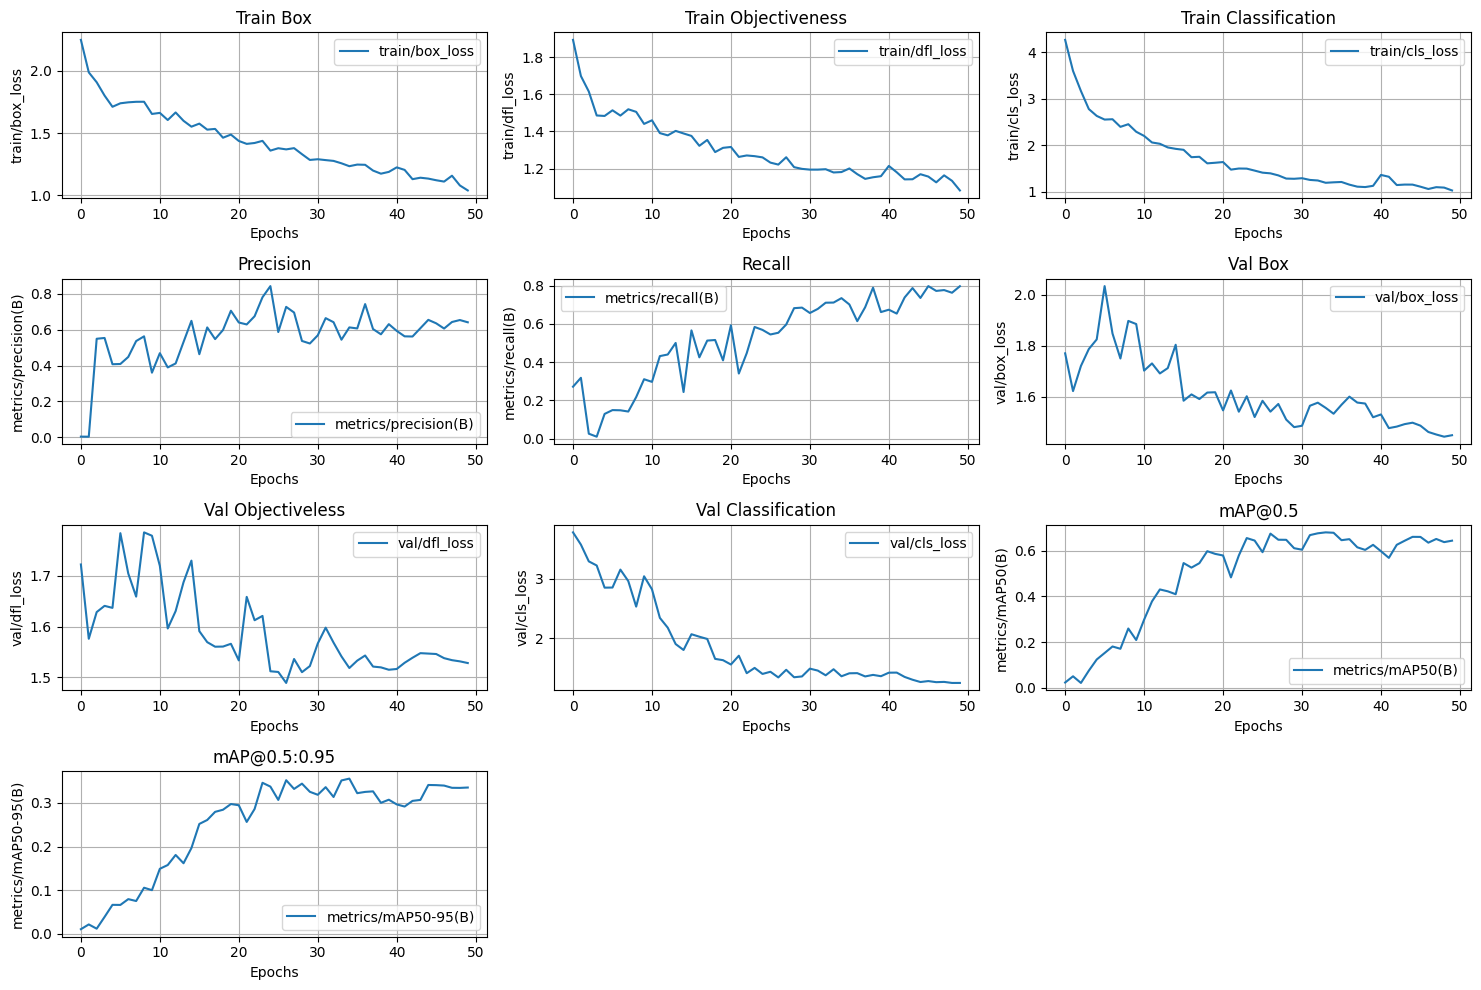

In [27]:

# Plot each metric
metrics_to_plot = ['train/box_loss','train/dfl_loss','train/cls_loss','metrics/precision(B)','metrics/recall(B)','val/box_loss','val/dfl_loss','val/cls_loss','metrics/mAP50(B)',	'metrics/mAP50-95(B)']
titles = ['Train Box','Train Objectiveness','Train Classification','Precision','Recall','Val Box','Val Objectiveless','Val Classification','mAP@0.5', 'mAP@0.5:0.95']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(4, 3, i + 1)  # Adjust grid size if needed
    plt.plot(results[metric], label=metric)
    plt.title(titles[i])
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()
